1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
4. Entrenar el modelo configurando los diferentes hiperparámetros.
5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.
6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo
7. Interpretar, analizar y documentar los resultados obtenidos.

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [160]:
#vamos a cargas las librerias

import pandas as pd #para manejar el data set
import numpy as np #las operaciones numericas
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans #para el punto #4
from sklearn.metrics import silhouette_score #para el coeficiente de silhouette
from sklearn.metrics import calinski_harabasz_score #para Índice de Calinski-Harabasz
from sklearn.metrics import davies_bouldin_score #para Índice de Davies-Bouldin

#Para graficos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px


In [14]:
#vamos a cargar nuestro dataset

df = pd.read_csv("Mall_Customers.csv")

In [16]:
df.head(21)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [18]:
#necesito saber la descripcion de los datos

df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [20]:
# Aunque existen valores extremos en 'Annual Income', corresponden a clientes reales con altos ingresos.
# Por lo tanto, no se eliminarán y continuamos con el análisis visual para detectar outliers.

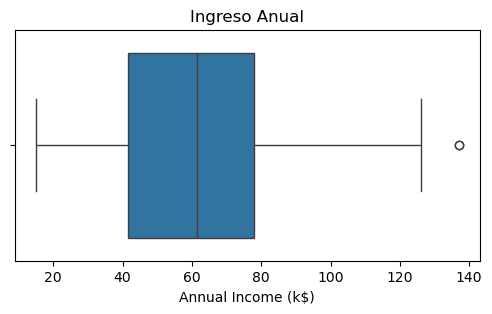

In [32]:
#vamos a detectar valores atipicos, en este caso para ver ingreso anual
plt.figure(figsize=(6,3))
sns.boxplot(x=df['Annual Income (k$)'])
plt.title('Ingreso Anual')
plt.show()

In [30]:
#podemos detectar que hay un cliente con un ingreso superior a 130K, muy por encima del promedio pero es un
#cliente valido asi que considero que no es necesario eliminarlo

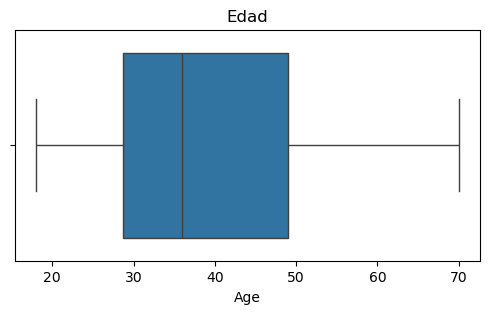

In [34]:
#ahora para la edad
plt.figure(figsize=(6,3))
sns.boxplot(x=df['Age'])
plt.title('Edad')
plt.show()

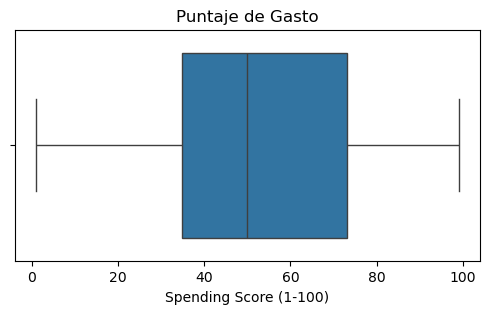

In [36]:
#todo normal, vamos con el score
plt.figure(figsize=(6,3))
sns.boxplot(x=df['Spending Score (1-100)'])
plt.title('Puntaje de Gasto')
plt.show()

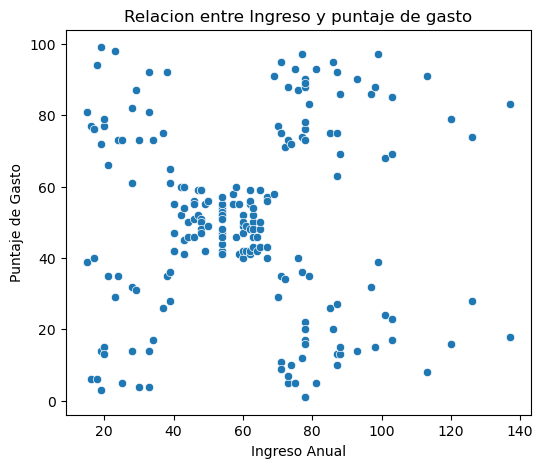

In [38]:
#tambien todo normal, vamos a ver los grupos de clientes
plt.figure(figsize=(6,5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Relacion entre Ingreso y puntaje de gasto')
plt.xlabel('Ingreso Anual')
plt.ylabel('Puntaje de Gasto')
plt.show()

In [40]:
# El grafico muestra patrones claros entre ingreso y gasto,
# se pueden identificar posibles grupos, lo que justifica usar algoritmos de agrupamiento.

## 2.Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [42]:
# Verificamos si hay valores nulos en cada columna
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [54]:
## como no tenermos ceros, ni valores faltantes, no necesitamos reemplazar ceros.

In [58]:
df_modelo = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [60]:
#ahora vamos a transformar los datos

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_modelo)

X_scaled[:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

In [66]:
#vamos a revisar los tipos de datos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

Las caracteristicas que voy a usar para el agrupamiento van a ser:

- Annual Income (Ingreso Anual)
- Spending Score (Indice de Gasto)
- Age (edad)

In [84]:
df = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [87]:
df.head(21)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


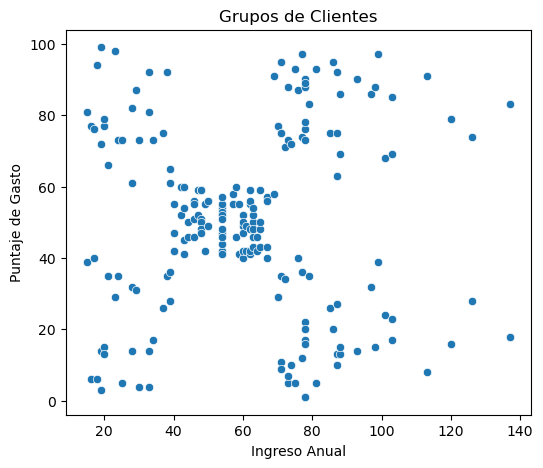

In [89]:
# ahora vamos a hacer la grafica para ver todos los datos que tenemos

plt.figure(figsize=(6,5))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'])
plt.title('Grupos de Clientes')
plt.xlabel('Ingreso Anual')
plt.ylabel('Puntaje de Gasto')
plt.show()

## 4. Entrenar el modelo configurando los diferentes hiperparámetros.

In [128]:
#vamos a crear una lista vacia para guardar los resultados
inercia = []

In [130]:
#ahora necesitamos probar difrentes cantidades de grupos (1-10)

for k in range(1,11):
    modelo = KMeans(n_clusters=k, random_state=42)
    modelo.fit(X_scaled)
    inercia.append(modelo.inertia_)

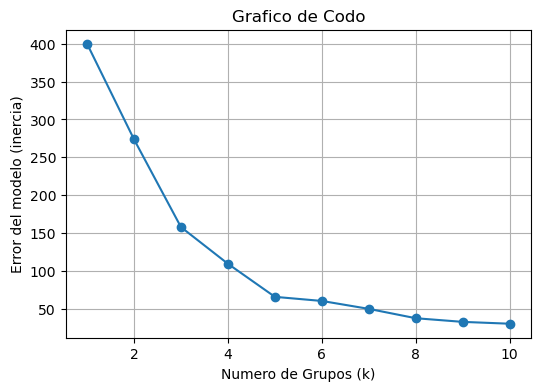

In [132]:
#para la grafica

plt.figure(figsize=(6,4))
plt.plot(range(1,11), inercia, marker='o')
plt.title('Grafico de Codo')
plt.xlabel('Numero de Grupos (k)')
plt.ylabel('Error del modelo (inercia)')
plt.grid(True)
plt.show()

In [138]:
#de acuerdo al grafico considero que quiero usar el modelo k=5, vamos a entrenar el modelo
modelo_final = KMeans(n_clusters=5, random_state=42)
modelo_final.fit(X_scaled)
df['Grupo'] = modelo_final.labels_
print(df.head())

   Age  Annual Income (k$)  Spending Score (1-100)  Grupo
0   19                  15                      39      4
1   21                  15                      81      2
2   20                  16                       6      4
3   23                  16                      77      2
4   31                  17                      40      4


In [140]:
#ahora vamos a graficar

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Grupo',
    data=df,
    palette='Set1', #solo para ponerle colores bonitos
    s=60

)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

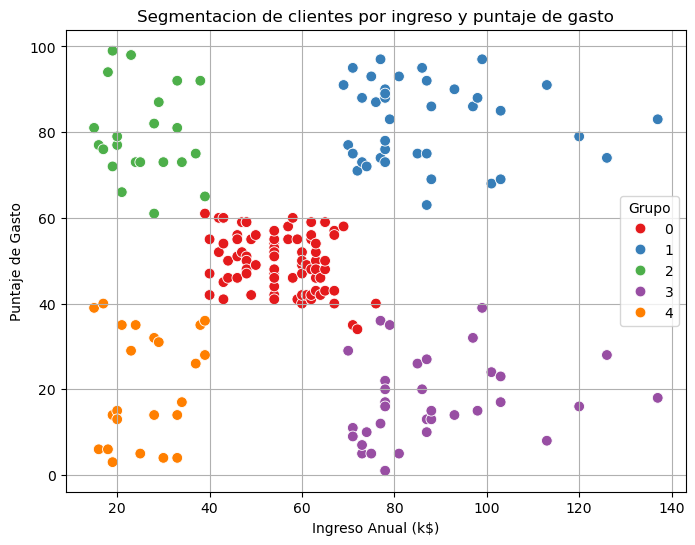

In [142]:
plt.title('Segmentacion de clientes por ingreso y puntaje de gasto')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntaje de Gasto')
plt.legend(title='Grupo')
plt.grid(True)
plt.show()

## 5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.

In [147]:
#vamos con el coeficiente de silhouette

silhouette = silhouette_score(X_scaled, modelo_final.labels_)
print(f"Coeficiente de Silhouette: {silhouette:.2f}")

Coeficiente de Silhouette: 0.55


In [151]:
#ahora Índice de Calinski-Harabasz

calinski = calinski_harabasz_score(X_scaled, modelo_final.labels_)
print(f"Índice de Calinski-Harabasz: {silhouette:.2f}")

Índice de Calinski-Harabasz: 0.55


In [155]:
#por ultimo Índice de Davies-Bouldin

db_index = davies_bouldin_score(X_scaled, modelo_final.labels_)
print(f"Índice de Davies-Bouldin: {db_index:.2f}")

Índice de Davies-Bouldin: 0.57


## 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

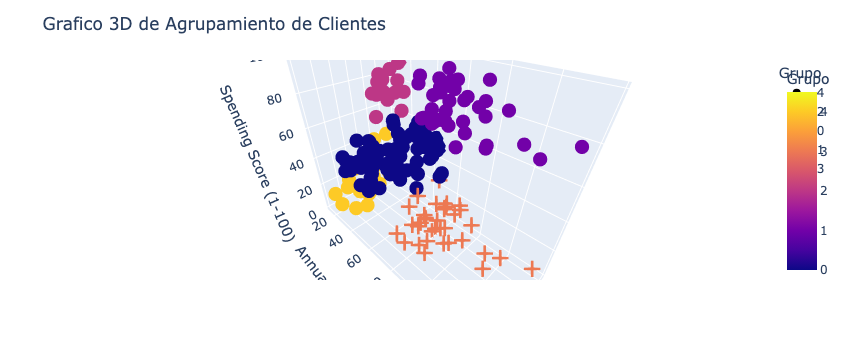

In [168]:
#como ya tengo mi grafico agrupado por colores, quiero hacerlo en 3d

grafico_3D = px.scatter_3d(
    df,
    x='Age',
    y='Annual Income (k$)',    z='Spending Score (1-100)',
    color='Grupo',
    symbol='Grupo',
    symbol_map={0: 'circle', 1: 'circle', 2: 'circle', 4: 'circle'}

)

grafico_3D.update_layout(title='Grafico 3D de Agrupamiento de Clientes')
grafico_3D.show()

## 7. Interpretar, analizar y documentar los resultados obtenidos.

Gracias a todo este proceso podemos decir que:

Teniendo en cuenta el proposito de nuestro dataset, luego de hacer la debida limpieza de datos, logramos
escoger los datos mas relevantes para hacer el agrupamiento, luego de que todos los datos estuvieran en la
misma escala, probamos con diferentes cantidades de grupos usando el metodo del codo, dentro del grafico se
nos hizo mas relevante usar k=5 como lo mejor opcion.

Al entrenar nuestro modelo, pudimos evaluar las tres metricas:

- Coeficiente de Silhouette: fue bueno, indicandonos que los grupos estan bien separados.
- Indice de Calinski-Harabasz: nos mostro un valor alto, lo que refuerza la idea de que los grupos estan
bien definidos.
- Indice de Davis-Bouldin: Este indice por el contrario fue bajo, pero segun la regla, es lo que se desea,
ya que indica que los grupos estan compactos y separados entre si.

Como algo adicional quise graficar los datos por colores y grupo, al igual en formato 3D ya que es mas sen-
cillo para la interpretacion de los datos, con esta grafica vimos que hay clientes con diferentes perfiles,
tenemos clientes que gastan mucho aunque tienen ingresos bajos, otros que tienen ingresos altos pero no
gastan tanto, al igual que añadir la edad, ayudo mucho a tener en cuenta que los clientes jovenes tienden a
tener ingresos mas bajos, mientras que los de mediana edad concentran los ingresos altos. Considero que esta
variable es muy importante si queremos segmentar clientes y ver que tipo de productos podemos ofrecer.